In [1]:
import os
os.chdir("/data/adv_geom/src")
from datagen.synthetic.multiple.concentricspheres import ConcentricSpheres

In [2]:
train_set, val_set, test_set = ConcentricSpheres.make_train_val_test_splits()


[RandomSphere]: generated centre
[RandomSphere]: generated points in k-dim
[RandomSphere]: pre-images generated
[RandomSphere]: embedded the sphere in n-dim space
[RandomSphere]: normalization complete
[ConcentricSpheres]: Generated S1
[RandomSphere]: generated centre
[RandomSphere]: generated points in k-dim
[RandomSphere]: pre-images generated
[RandomSphere]: embedded the sphere in n-dim space
[RandomSphere]: normalization complete
[ConcentricSpheres]: Generated S2
[ConcentricSpheres]: Overall noramalization done
[RandomSphere]: generated centre
[RandomSphere]: generated points in k-dim
[RandomSphere]: pre-images generated
[RandomSphere]: embedded the sphere in n-dim space
[RandomSphere]: normalization complete
[ConcentricSpheres]: Generated S1
[RandomSphere]: generated centre
[RandomSphere]: generated points in k-dim
[RandomSphere]: pre-images generated
[RandomSphere]: embedded the sphere in n-dim space
[RandomSphere]: normalization complete
[ConcentricSpheres]: Generated S2
[Concen

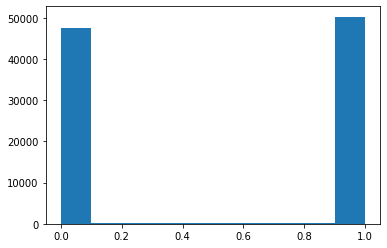

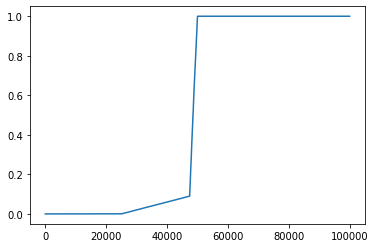

In [3]:
import matplotlib.pyplot as plt
plt.hist(train_set.normed_all_smooth_distances.numpy()[:, 0])
plt.show()
plt.plot(sorted(train_set.normed_all_smooth_distances.numpy()[:, 0]))
plt.show()

In [4]:
train_set.normed_all_smooth_distances.numpy()[:, 0].max()

1.0

In [5]:
train_set.all_actual_distances[(train_set.all_actual_distances > train_set.bp) & (train_set.all_actual_distances <= train_set.max_norm)]

tensor([0.0959, 0.0960, 0.0995,  ..., 0.0983, 0.0929, 0.0923])